Text(0.5, 1.0, 'very_final.jpg')

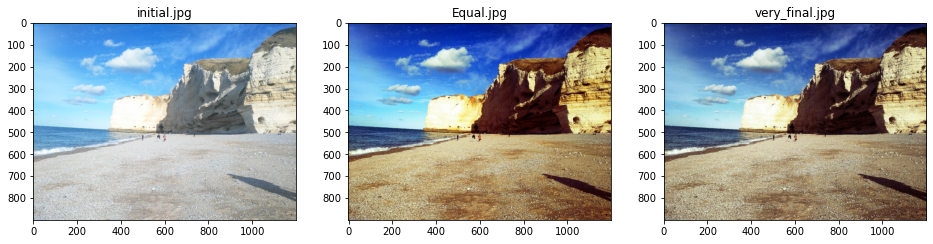

In [1]:
# Construction finale: equalization + module d'ImageEnhance(color, brightness, ...)
#Source: https://www.programmersought.com/article/61683872029/
#https://pillow.readthedocs.io/en/stable/reference/ImageEnhance.html

import cv2
import numpy as np
import matplotlib.pyplot as pyplot
import argparse
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
from skimage.io import imread,imsave,imshow

##################################

# EQUALIZATION PART

#################################

img = plt.imread('etretat.jpg', 1)
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(img)
plt.title('initial.jpg')

imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]

count_b = np.zeros(256, np.float) # Because it is a probability, it may be a floating point number
count_g = np.zeros(256, np.float)
count_r = np.zeros(256, np.float)


# Count the number of pixels and calculate the probability
for i in range(height):
    for j in range(width):
        (b, g, r) = img[i, j]

        index_b = int(b)
        index_g = int(g)
        index_r = int(r)

        count_b[index_b] = count_b[index_b] + 1
        count_g[index_g] = count_g[index_g] + 1
        count_r[index_r] = count_r[index_r] + 1

total = height * width # Total pixels
count_b =  count_b / total  # Calculate probability
count_g =  count_g / total
count_r =  count_r / total

# Calculate the cumulative probability
sum_b = sum_g = sum_r = float(0)
for i in range(256):
    sum_b += count_b[i]
    count_b[i] = sum_b # Calculate the cumulative probability
    
    sum_g += count_g[i]
    count_g[i] = sum_g

    sum_r += count_r[i]
    count_r[i] = sum_r

# Calculate the mapping table
mapl_b = np.uint16(255 * count_b)
mapl_g = np.uint16(255 * count_g)
mapl_r = np.uint16(255 * count_r)

# Map the image
dst = np.zeros((height, width, 3), np.uint8)
for i in range(height):
    for j in range(width):
        (b, g, r) = img[i, j]
        b = mapl_b[b]
        g = mapl_g[g]
        r = mapl_r[r]

        dst[i, j] = (b, g, r)

plt.subplot(132) 
plt.imshow(dst)
plt.imsave("Equal.jpg", dst)
plt.title('Equal.jpg')

img = Image.open('final.jpg')
# img = img.filter(ImageFilter.DETAIL)

#########################################

#PARAMETERS ADD

#########################################
#-------------------PARAMETRES------------------------
gamma = 1
saturation = 0.7
contrast = 1
luminosite = 1
nettete = 1 # sharpness
#-----------------------------------------------------

converter = ImageEnhance.Color(img)
img = converter.enhance(saturation)
converter = ImageEnhance.Brightness(img)
img = converter.enhance(luminosite)
converter = ImageEnhance.Sharpness(img)
img = converter.enhance(nettete)
#converter = ImageEnhance.Contrast(img)
#img = converter.enhance(contrast) 

img.save("very_final.jpg")
plt.subplot(133)
plt.imshow(imread('very_final.jpg'))
plt.title('very_final.jpg')


Une premiere modification des pixels est apportée avec equalization. Ensuite en utilisant les differents module de ImageEnhancement de la librairie PIL, on peut jouer sur des parametres comme la luminosité 

Text(0.5, 1.0, 'Contraste.jpg')

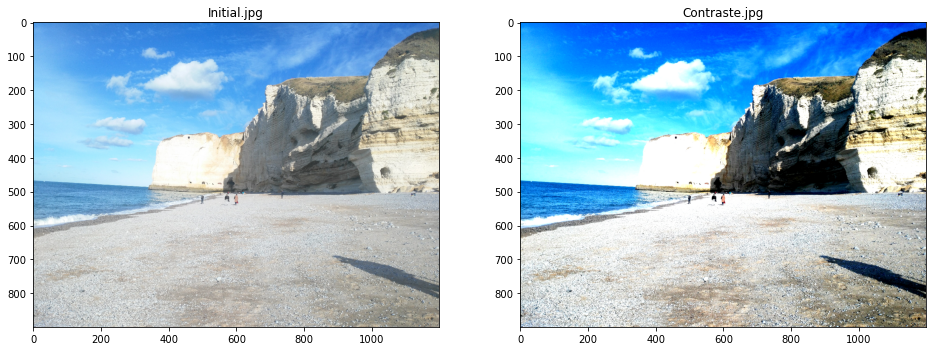

In [2]:
import PIL
from PIL import Image, ImageFilter
from skimage.io import imread, imsave, imshow
import matplotlib.pyplot as plt

#Lire l'image
im = Image.open('etretat.jpg')

#Affiche l'image
#im.show()

from PIL import ImageEnhance
enh = ImageEnhance.Contrast(im)
enh.enhance(2)
enh.enhance(2).save("50% more contrast.PNG","PNG")

im1 = Image.open("50% more contrast.PNG")
#pil_im = Image.open(enh)

# Plot
plt.figure(figsize=(16,16))
plt.subplot(121)
plt.imshow(im)
plt.title('Initial.jpg')
plt.subplot(122)
plt.imshow(im1)
plt.title('Contraste.jpg')

Text(0.5, 1.0, 'gamma.jpg')

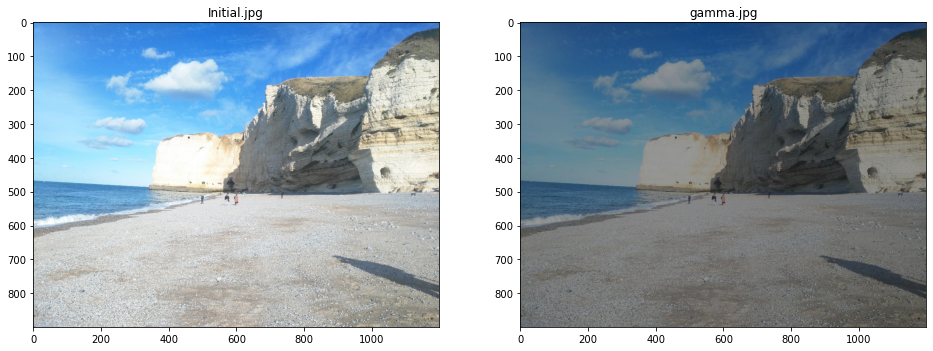

In [3]:
from __future__ import print_function
import numpy as np
import argparse
import cv2
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
from skimage.io import imread,imsave,imshow

def adjust_gamma(image, gamma=1):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 150
        for i in np.arange(0, 256)]).astype("uint8")
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

# plt.subplot(122)
#input_image= imread("etretat.jpg")
imsave("gamma.jpg", adjust_gamma(imread("etretat.jpg"), gamma))
img = Image.open('gamma.jpg')

#Plot
plt.figure(figsize=(16,16))
plt.subplot(121)
plt.imshow(imread("etretat.jpg"))
plt.title('Initial.jpg')

plt.subplot(122)
plt.imshow(imread("gamma.jpg"))
plt.title('gamma.jpg')

Adjust gamma/ gamma correction met un voile sur l'image. 
Utiliser une modification ne suffit pas il faut combiner plusieurs modifications.


Essai avec les filtres: 

Text(0.5, 1.0, 'MI.jpg')

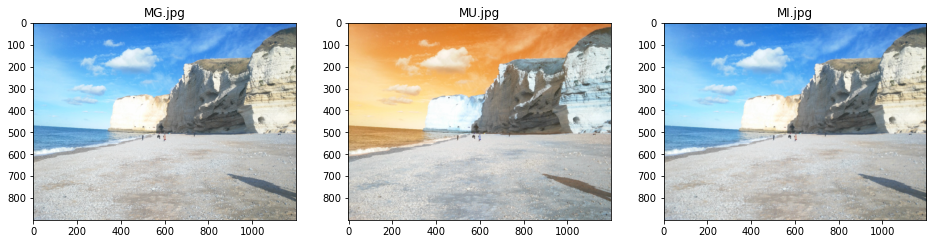

In [4]:
from skimage.filters.rank import mean, median
from skimage.io import imread,imsave,imshow
import cv2
from cv2 import medianBlur
import matplotlib.pyplot as plt
import glob 

im = imread('etretat.jpg')

blurred1 = cv2.medianBlur(im, 3)
cv2.imshow('Median filter - Gaussian noise1',blurred1)
#cv2.waitKey()
cv2.imwrite("Median filter - Gaussian noise1.jpg",blurred1)

noisy_image2 = imread("Median filter - Gaussian noise1.jpg")

blurred2 = cv2.medianBlur(noisy_image2, 3)
cv2.imshow('Median filter - Uniform noise1',blurred2)
#cv2.waitKey()
cv2.imwrite("Median filter - Uniform noise1.jpg",blurred2)

noisy_image3 = imread("Median filter - Uniform noise1.jpg")

blurred3 = cv2.medianBlur(noisy_image3, 3)
cv2.imshow('Median filter - Impuls noise1',blurred3)
#cv2.waitKey()
cv2.imwrite("Median filter - Impuls noise1.jpg",blurred3)

plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(cv2.imread("Median filter - Gaussian noise1.jpg"))
plt.title('MG.jpg')
plt.subplot(132)
plt.imshow(cv2.imread("Median filter - Uniform noise1.jpg"))
plt.title('MU.jpg')
plt.subplot(133)
plt.imshow(cv2.imread("Median filter - Impuls noise1.jpg"))
plt.title('MI.jpg')